In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import pearsonr

In [110]:
# Load the data 
data = pd.read_csv("LeosData.csv", sep=",")
data.head()

,Patient,Age,Sex,WFNS_Group,WFNS,Aneursym_location,DCI,eGOS,SD_Day,Total_SD,Single_SD,Clusters_SD,Mean_LPRX
0,HD-1,55,F,high-grade,4,Acom,Yes,0,4.6,46,24,22,0.18
1,HD-2,38,M,high-grade,4,Acom,Yes,3,1.1,6,6,0,0.10
2,HD-3,28,F,high-grade,5,ICA-R,Yes,3,0.4,4,4,0,-0.04
3,HD-4,47,M,high-grade,5,Acom,No,4,0.8,3,3,0,0.26
4,HD-5,68,F,Low-grade,2,MCA-R,No,6,0.0,9,9,0,0.15


## Data Transformation for the corresponding columns

In [119]:
# Data Transformation

# Sex (dichotonomous variable)
data["Sex_Num"] = 0
data.loc[data["Sex"] ==  "F", 'Sex_Num'] = 0
data.loc[data["Sex"] ==  "M", 'Sex_Num'] = 1

# WFNS_Group (dichotonomous variable)
data["WFNS_Group_Num"] = 0
data.loc[data["WFNS_Group"] ==  "high-grade", 'WFNS_Group_Num'] = 1
data.loc[data["WFNS_Group"] ==  "Low-grade", 'WFNS_Group_Num'] = 0

# WFNS_Group (ordinal variable. It can take 0,1,2 values)
data["DCI_NUM"] = 0
data.loc[data["DCI"] ==  "Yes", 'DCI_NUM'] = 1
data.loc[data["DCI"] ==  "No", 'DCI_NUM'] = 0
data.loc[data["DCI"] ==  "Probably", 'DCI_NUM'] = 0

# Aneursym_location (nominal variable, but there is no order in values)
# One hot encodig is needed
anae_values_dummies = pd.get_dummies(data["Aneursym_location"], prefix="AL") 
sub_data = pd.concat([data, anae_values_dummies], axis='columns')


# DCI (nominal variable, but there is no order in values)
# get the dummies and store it in a variable
dci_dummies = pd.get_dummies(data["DCI"], prefix="DCI") 
# Concatenate the dummies to original dataframe
sub_data = pd.concat([sub_data, dci_dummies], axis='columns')


#print(sub_data)
sub_data = sub_data.loc[:,
                       ['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS','AL_Acom',
                        'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L',
                        'AL_MCA-R',  'DCI_NUM',  'DCI_No', 'DCI_Probably', 'DCI_Yes',
                        'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']
                   ]
sub_data


# new_col = pd.Categorical(data["Aneursym_location"]).codes
# new_col = pd.Series(new_col)
# # # Concatenate the dummies to original dataframe
# data = pd.concat([data, new_col], axis='columns')
# data.rename(columns={0:"Aneursym_location_Num"}, inplace=True)



,Age,Sex_Num,WFNS_Group_Num,WFNS,AL_Acom,AL_ICA-L (Pcom),AL_ICA-R,AL_ICA-R (Pcom),AL_MCA-L,AL_MCA-R,DCI_NUM,DCI_No,DCI_Probably,DCI_Yes,eGOS,Single_SD,Clusters_SD,Mean_LPRX
0,55,0,1,4,1,0,0,0,0,0,1,0,0,1,0,24,22,0.18
1,38,1,1,4,1,0,0,0,0,0,1,0,0,1,3,6,0,0.10
2,28,0,1,5,0,0,1,0,0,0,1,0,0,1,3,4,0,-0.04
3,47,1,1,5,1,0,0,0,0,0,0,1,0,0,4,3,0,0.26
4,68,0,0,2,0,0,0,0,0,1,0,1,0,0,6,9,0,0.15
5,52,0,1,5,0,0,1,0,0,0,1,0,0,1,0,4,0,0.05
6,78,1,1,5,0,0,0,1,0,0,1,0,0,1,3,5,0,0.14
7,46,1,1,4,0,0,0,0,1,0,0,1,0,0,3,4,0,-0.20
8,54,0,1,4,0,0,0,0,1,0,0,1,0,0,2,5,0,0.34
9,52,1,1,5,1,0,0,0,0,0,1,0,0,1,0,4,0,0.00


## Descriptive Analysis

<Axes: xlabel='Mean_LPRX', ylabel='Count'>

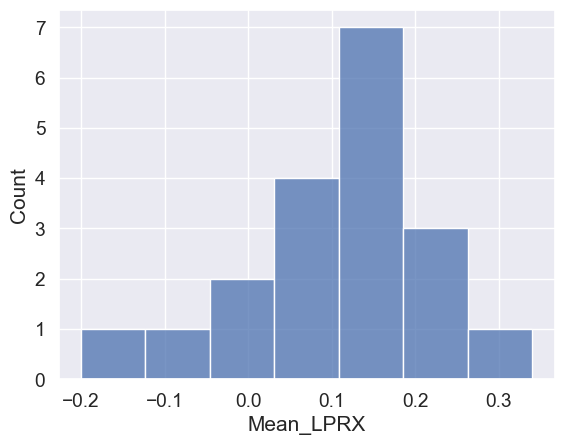

In [120]:
#histogram of the dependent variable
sbn.histplot(sub_data['Mean_LPRX'])

Pearson Corr Age vs Mean LPRX:  0.3584184151607953
Spearman Corr Age vs Mean LPRX:  0.5180475810991894
Kendall Corr Age vs Mean LPRX:  0.3224239743743273


<Axes: xlabel='Age', ylabel='Mean_LPRX'>

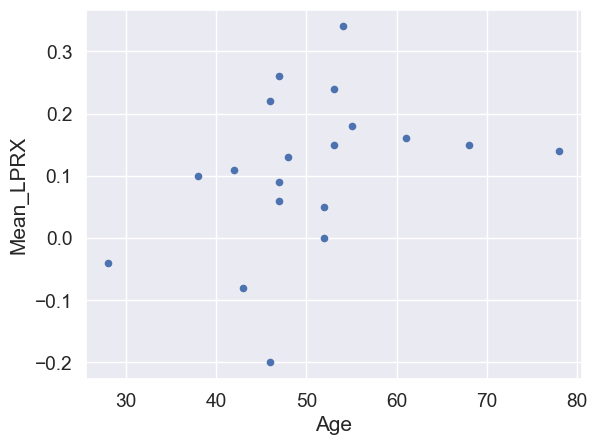

In [121]:
# Relationship with numerical variables (Age vs Mean LPRX)

# Correlation
print("Pearson Corr Age vs Mean LPRX: ", sub_data['Age'].corr(sub_data['Mean_LPRX'], method="pearson"))
print("Spearman Corr Age vs Mean LPRX: ", sub_data['Age'].corr(sub_data['Mean_LPRX'], method="spearman"))
print("Kendall Corr Age vs Mean LPRX: ", sub_data['Age'].corr(sub_data['Mean_LPRX'], method="kendall"))

# Scatter plot
result = sub_data.loc[:,["Age","Mean_LPRX"]]
result.plot.scatter(x="Age", y='Mean_LPRX')


## Pearson Correlation

<Axes: >

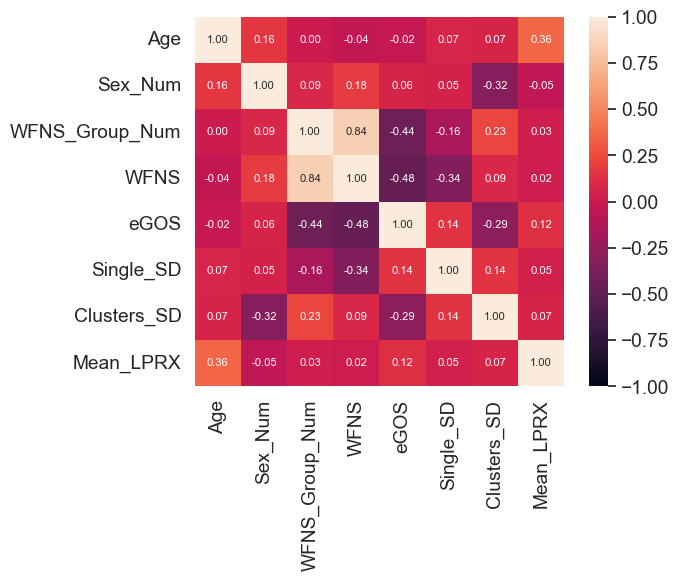

In [144]:
#correlation matrix
sub_data_corr = sub_data.loc[:,
                             ['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 
                               #'AL_Acom', 'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L', 'AL_MCA-R',
                               #'DCI_NUM', 'DCI_No', 'DCI_Probably', 'DCI_Yes', 
                               'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']]

corrmat = sub_data_corr.corr()
sbn.heatmap(corrmat, cbar=True, annot=True, vmin=-1,vmax=1, square=True, fmt='.2f', annot_kws={'size': 8})

In [146]:
def printCorrelation(col1, col2):
    from pandas.api.types import is_numeric_dtype
    if is_numeric_dtype(sub_data[col1]) and is_numeric_dtype(sub_data[col2]):
        _result = pearsonr(sub_data[col1], sub_data[col2])
        print(f"{col1} vs {col2} : Statistic: {_result[0]:.2f}, p-Value: {_result[1]:.2f}")


colum_list =  ['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']
printCorrelation("Mean_LPRX","Age")
printCorrelation("eGOS","Age")

# for i in colum_list:
#     for j in colum_list:
#         if i == j: continue
#         printCorrelation(j,i)


Mean_LPRX vs Age : Statistic: 0.36, p-Value: 0.13
eGOS vs Age : Statistic: -0.02, p-Value: 0.93


## Spearman Corrrelation

<Axes: >

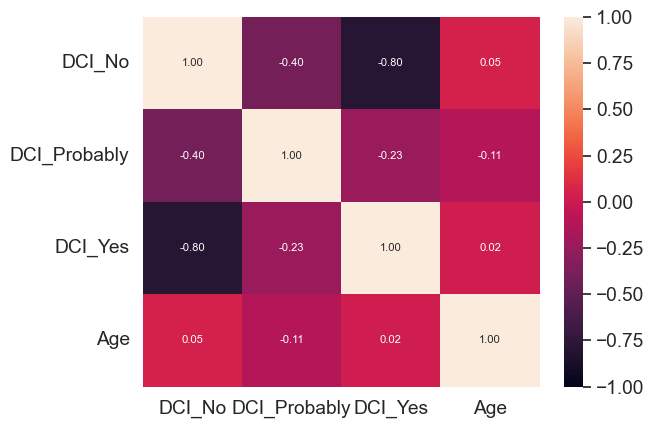

In [151]:
# Spearman correlation
res = sub_data.loc[:,["DCI_No","DCI_Probably", "DCI_Yes", "Age"]].corr(method="spearman")
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})
# ['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS',
# 'AL_Acom', 'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L', 'AL_MCA-R', 
# 'DCI_NUM', 'DCI_No', 'DCI_Probably', 'DCI_Yes', 
# 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']]

<Axes: >

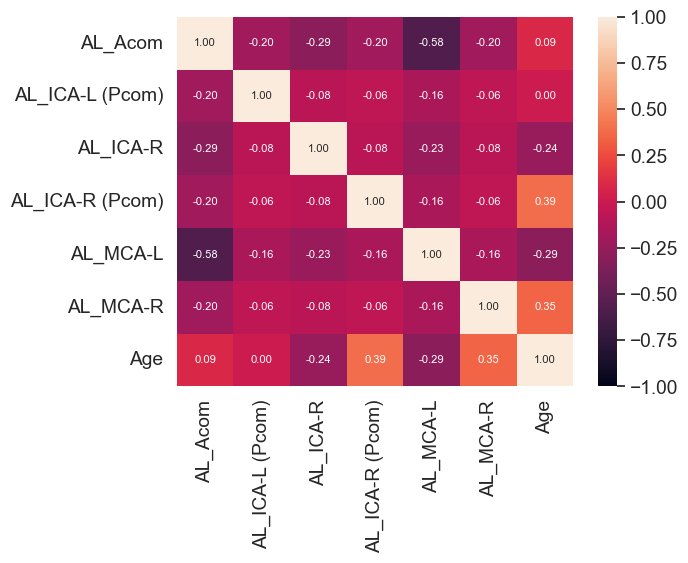

In [152]:
# Spearman correlation
res = sub_data.loc[:,[
                        'AL_Acom', 'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L', 'AL_MCA-R', 
                        "Age"]].corr(method="spearman")
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})


<Axes: >

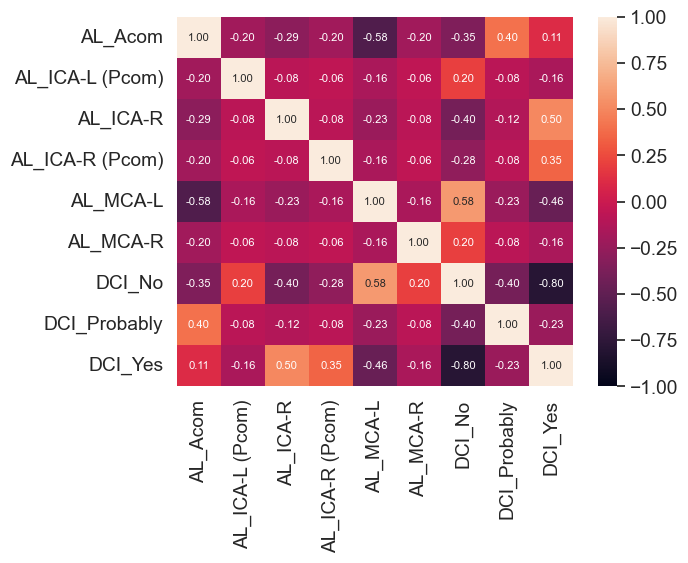

In [154]:
# Spearman correlation
res = sub_data.loc[:,[
                        'AL_Acom', 'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L', 'AL_MCA-R',                         
                        'DCI_No', 'DCI_Probably', 'DCI_Yes']].corr(method="spearman")
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})


In [ ]:
# Spearman correlation
#['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 'eGOS', 'Single_SD', 'Clusters_SD', 'Mean_LPRX']
res = sub_data.loc[:,[
                        'AL_Acom', 'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L', 'AL_MCA-R',                         
                        'DCI_No', 'DCI_Probably', 'DCI_Yes']].corr(method="spearman")
sbn.heatmap(res, vmin=-1,vmax=1, annot=True, fmt='.2f', annot_kws={'size': 8})

## Point Biserial Correlation

In [ ]:
#stats.pointbiserialr(a, b)

In [155]:

# def performChi2test(col1,col2):
#     print("-------------------------------------------------")
#     print(f"-------- {col1} vs {col2} ------")
#     print("-------------------------------------------------")
#     # Cross tabulation between GENDER and APPROVE_LOAN
#     CrosstabResult=pd.crosstab(index=sub_data[col1],columns=sub_data[col2])
#     print(CrosstabResult)    
#     # importing the required function
#     from scipy.stats import chi2_contingency
#     # Performing Chi-sq test (independence between 2 categorical values)
#     ChiSqResult = chi2_contingency(CrosstabResult)    
#     # Assumption(H0): The two columns are NOT related to each other
#     # P-Value is the Probability of H0 being True
#     # If P-value is > 0.05 then only we Accept the assumption(H0)
#     print(f"The P-Value of the ChiSq Test is: {ChiSqResult[1]:.4f}")
#     x = "Variables not correlated to each other" if ChiSqResult[1] > 0.05 else "Variables correlated to each other"
#     print(x)    

# #performChi2test("Sex","Aneursym_location")
# #performChi2test("Sex","DCI")
# performChi2test("Aneursym_location","DCI")

## Linear Regression

In [171]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

sub_data.columns

X = sub_data.loc[:,['Age', 'Sex_Num', 'WFNS_Group_Num', 'WFNS', 'AL_Acom',
       'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L',
       'AL_MCA-R', 'DCI_NUM', 'DCI_No', 'DCI_Probably', 'DCI_Yes', 'eGOS',
       'Single_SD', 'Clusters_SD']]
Y = sub_data["Mean_LPRX"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
    
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
print(f"Intercept: {model.intercept_} \n Coefficients: {model.coef_} \n R2 = {model.score(X, Y)}")

LinearRegression()


In [211]:
import statsmodels.api as sm


X = sub_data.loc[:,[
        'Age', 
        'Sex_Num', 
        #'WFNS_Group_Num', 
        #'WFNS', 
        'AL_ICA-L (Pcom)', 'AL_ICA-R', 'AL_ICA-R (Pcom)', 'AL_MCA-L', 'AL_MCA-R', 'AL_Acom',
        #'DCI_NUM', 
        'DCI_No', 'DCI_Probably', 'DCI_Yes', 
        #'eGOS',
        #'Single_SD', 
        #'Clusters_SD'
       ]]
Y = sub_data["Mean_LPRX"]

#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Mean_LPRX   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                 -0.064
Method:                 Least Squares   F-statistic:                    0.8803
Date:                Thu, 16 Mar 2023   Prob (F-statistic):              0.574
Time:                        17:07:33   Log-Likelihood:                 18.782
No. Observations:                  19   AIC:                            -17.56
Df Residuals:                       9   BIC:                            -8.120
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                 0.0031      0.005     

c:\Users\vegaarellano\Documents\Github\ComputerVision-main\ComputerVision-main\venv-data-analysis\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [181]:
#display regression coefficients and R-squared value of model


Intercept: -0.5452266804628249 
 Coefficients: [ 1.73800799e-02 -5.75226817e-02  4.75011999e-02 -9.16231339e-02
  1.48462538e-01  4.49796017e-02  1.97220254e-01 -3.64438020e-01
 -2.62243737e-02  3.55618313e-17  6.81186606e-02 -8.44007289e-03
 -1.43129319e-03] 
 R2 = -1.0192528493377941
